In [32]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom
import os
import scipy.ndimage
from pydicom import dcmread
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
from pydicom.pixel_data_handlers.util import convert_color_space
#from scikit-image import measure, morphology
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [42]:
DATA_MASK = '../data_mask/112/IM-0001-0030.dcm'
ds = dcmread(DATA_MASK)
pixel_data = ds.pixel_array.astype(np.uint8)

# Check if the image has multiple frames
if 'NumberOfFrames' in ds:
    num_frames = int(ds.NumberOfFrames)
    if num_frames > 1:
        print("The DICOM image has multiple frames.")
    else:
        print("The DICOM image has a single frame.")
else:
    print("The DICOM image does not contain frame information.")

# Check if the image is RGB
if 'PhotometricInterpretation' in ds:
    if ds.PhotometricInterpretation == 'RGB':
        print("The DICOM image is in RGB color space.")
    else:
        print("The DICOM image is not in RGB color space.")
else:
    print("The DICOM image does not have color information.")

# Check if Overlay Data exists in the metadata
if 'OverlayData' in ds:
    overlay_data = ds.OverlayData  # Get the binary overlay data
    overlay_rows = ds.OverlayRows  # Get the number of rows in the overlay plane
    overlay_cols = ds.OverlayColumns  # Get the number of columns in the overlay plane
    overlay_description = ds.OverlayDescription  # Get the overlay description

    # Process the overlay data or extract relevant information
    # ...

    # Print information about the annotations
    print("Overlay Description:", overlay_description)
    print("Overlay Rows:", overlay_rows)
    print("Overlay Columns:", overlay_cols)
else:
    print("No overlay data found in the DICOM metadata.")
# Get the annotated mask region (assume rectangular region for simplicity)
mask_region = pixel_data[100:300, 150:320]

# Analyze the pixel values within the mask region
min_rgb = np.min(mask_region, axis=(0, 1))
max_rgb = np.max(mask_region, axis=(0, 1))

print("Minimum RGB values:", min_rgb)
print("Maximum RGB values:", max_rgb)

The DICOM image does not contain frame information.
The DICOM image is in RGB color space.
No overlay data found in the DICOM metadata.
Minimum RGB values: [0 0 0]
Maximum RGB values: [255 255 255]


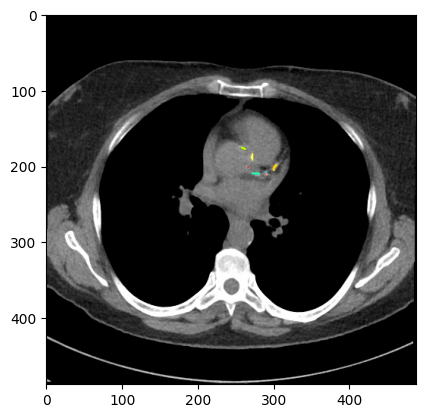

In [43]:

# plot the image using matplotlib
plt.imshow(ds.pixel_array )
plt.show()
pixel_array_m = ds.pixel_array


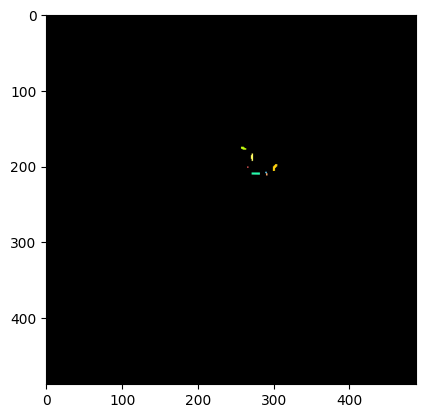

In [21]:
# Assuming you have loaded the RGB image as 'image' with shape (height, width, 3)

# Calculate the maximum and minimum RGB channel values for each pixel
max_vals = np.max(pixel_array_m, axis=2)
min_vals = np.min(pixel_array_m, axis=2)

# Check for pixels where the difference between maximum and minimum values is less than or equal to 2
diff = max_vals - min_vals
threshold = -1
equal_diff_pixels = diff <= threshold

# Set the equal difference pixels to black (0, 0, 0)
pixel_array_m[equal_diff_pixels] = [0, 0, 0]
plt.imshow(pixel_array_m)

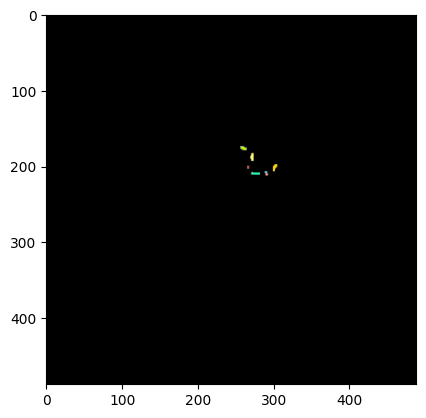

In [44]:
# Check for pixels where R, G, and B values are equal or have a difference of 2
equal_diff_pixels = np.all(np.abs(np.diff(pixel_array_m, axis=2)) == 0, axis=2)
img = pixel_array_m
img[equal_diff_pixels] = [0, 0, 0]

# Set the equal difference pixels to black (0, 0, 0)
plt.imshow(img)

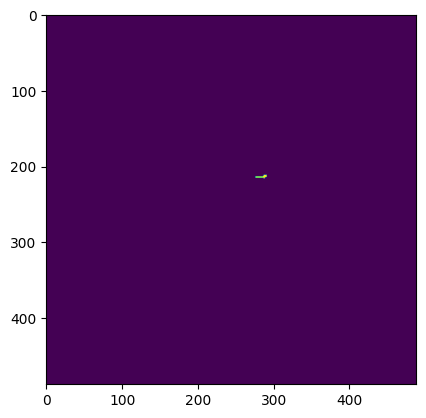

In [18]:
hsv_image = cv2.cvtColor(pixel_array_m, cv2.COLOR_RGB2HSV)

# Define lower and upper thresholds for red color in HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([0, 255, 255])

# Create a mask by applying the color threshold
mask = cv2.inRange(hsv_image, lower_red, upper_red)

# Apply morphological operations to enhance the mask
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=20)
#mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=20)

# Convert the mask to a binary mask
binary_mask = np.where(mask > 0, 255, 0).astype(np.uint8)

# Display or save the red mask
plt.imshow(binary_mask)


In [7]:
# Step 1: Load the image

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(pixel_array_m, cv2.COLOR_RGB2GRAY)

# Step 3: Threshold the grayscale image
_, binary_mask = cv2.threshold(gray_image, 190, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Step 4: Extract the colored mask
colored_mask = cv2.bitwise_and(pixel_array_m, pixel_array_m, mask=binary_mask)
cv2.imshow('Extracted Mask', binary_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()